<a href="https://colab.research.google.com/github/ClovisL/python-api-scripts/blob/main/WeatherPy/WeatherPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeatherPy

In [6]:
pip install citipy

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
import sys
sys.path.append('/content/drive/MyDrive')


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "https://raw.githubusercontent.com/ClovisL/python-api-scripts/main/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Base url
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# List of city data
cityData = []

# Grouping variables
# Group
set_count = 1
# Record within group
record = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for i, city in enumerate(cities):
    # group the cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record = 1
        
    # Output the record and group being processed
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    # Increase record number in the set
    record += 1
    
    # Create URL that includes city
    cityURL = url + city
    
    # Call the OpenWeather API
    try:
        cityWeather = requests.get(cityURL).json()
        
        # Parse out data
        lat = cityWeather["coord"]["lat"]
        lng = cityWeather["coord"]["lon"]
        maxTemp = cityWeather["main"]["temp_max"]
        humidity = cityWeather["main"]["humidity"]
        cloudiness = cityWeather["clouds"]["all"]
        windspeed = cityWeather["wind"]["speed"]
        country = cityWeather["sys"]["country"]
        date = cityWeather["dt"]
        
        cityData.append({"City": city,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": maxTemp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": windspeed,
                         "Country": country, 
                        "Date": date})
    except:
        print(f"{city} not found. Skipping...")
        pass

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | vao
Processing Record 4 of Set 1 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 5 of Set 1 | rembang
Processing Record 6 of Set 1 | taltal
Processing Record 7 of Set 1 | roald
Processing Record 8 of Set 1 | puerto varas
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | vaitupu
vaitupu not found. Skipping...
Processing Record 11 of Set 1 | gander
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | amderma
amderma not found. Skipping...
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | taolanaro
taolanaro not fou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Creates a data frame out of the raw data, and exports it as a csv
cityData_df = pd.DataFrame(cityData)
cityData_df.to_csv(output_data_file, index=False)

In [12]:
# Displays the data frame
cityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,65.12,59,0,2.15,US,1644573686
1,mar del plata,-38.0023,-57.5575,67.08,95,100,15.99,AR,1644573687
2,vao,-22.6667,167.4833,81.41,86,100,28.39,NC,1644573687
3,rembang,-6.7070,111.3498,80.35,84,100,5.66,ID,1644573687
4,taltal,-25.4000,-70.4833,64.54,81,17,0.65,CL,1644573688
...,...,...,...,...,...,...,...,...,...
552,gat,31.6100,34.7642,57.90,100,25,9.48,IL,1644573875
553,makat,47.6469,53.3463,33.71,88,99,13.31,KZ,1644573875
554,cehegin,38.0924,-1.7985,51.66,41,93,3.91,ES,1644573875
555,chincholi,17.4667,77.4333,87.46,23,2,7.63,IN,1644573876


In [13]:
cityData_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,19.741105,20.019245,51.691131,71.263914,53.842011,7.819210,1.644574e+09
std,33.534309,91.605539,31.836960,23.017283,40.834552,5.812715,8.607546e+01
min,-54.800000,-179.166700,-40.790000,7.000000,0.000000,0.000000,1.644573e+09
25%,-7.381700,-63.057800,33.940000,60.000000,8.000000,3.420000,1.644574e+09
50%,24.093400,20.040300,60.800000,76.000000,62.000000,6.170000,1.644574e+09
75%,47.646900,102.500000,77.230000,89.000000,99.000000,10.650000,1.644574e+09
max,78.218600,179.316700,99.430000,100.000000,100.000000,31.070000,1.644574e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
index_humidity = cityData_df.index[cityData_df["Humidity"] >= 100].tolist()
index_humidity

[85, 267, 270, 294, 306, 386, 390, 410, 431, 464, 472, 504, 552]

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityData_df.drop(index_humidity)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,65.12,59,0,2.15,US,1644573686
1,mar del plata,-38.0023,-57.5575,67.08,95,100,15.99,AR,1644573687
2,vao,-22.6667,167.4833,81.41,86,100,28.39,NC,1644573687
3,rembang,-6.7070,111.3498,80.35,84,100,5.66,ID,1644573687
4,taltal,-25.4000,-70.4833,64.54,81,17,0.65,CL,1644573688


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

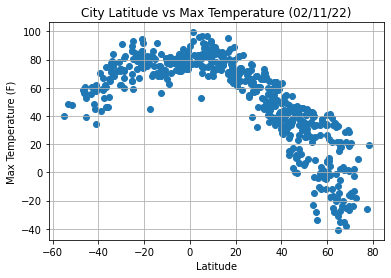

In [17]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Max Temp"])
plt.title(f"City Latitude vs Max Temperature ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

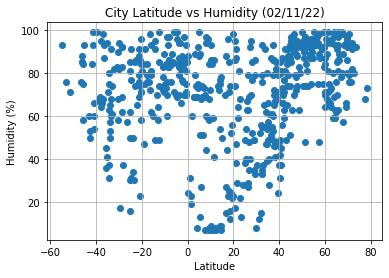

In [18]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Humidity"])
plt.title(f"City Latitude vs Humidity ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

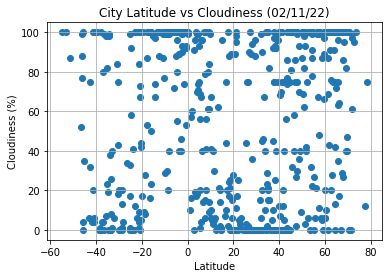

In [19]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Cloudiness"])
plt.title(f"City Latitude vs Cloudiness ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

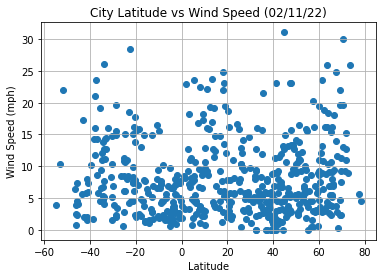

In [20]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Wind Speed"])
plt.title(f"City Latitude vs Wind Speed ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [21]:
# Divides the data frames into northern and souther hemispheres
north_hem = clean_city_data.loc[clean_city_data["Lat"] > 0]
south_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Establish y values to find St. Pearson Correlation Coefficient for Latitude for Hemispheres
north_lat = north_hem["Lat"]
south_lat = south_hem["Lat"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.88


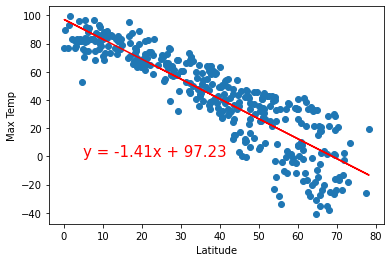

In [27]:
# Establish x value and find St. Pearson Correlation Coefficient for Max Temp
north_temp = north_hem["Max Temp"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_temp)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Max Temp"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation, (5,0), fontsize=15, color="r")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.61


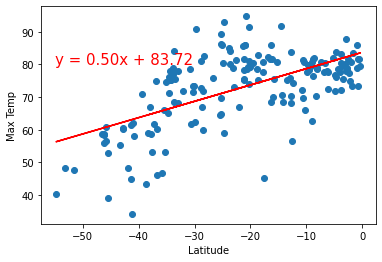

In [28]:
# Establish x value and find St. Pearson Correlation Coefficient for Max Temp
south_temp = south_hem["Max Temp"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_temp)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Max Temp"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation, (-55,80), fontsize=15, color="r")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.48


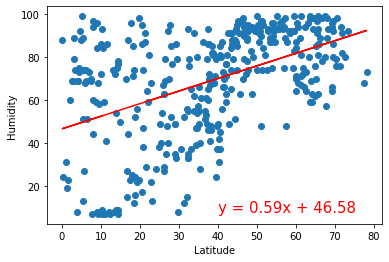

In [29]:
# Establish x value and find St. Pearson Correlation Coefficient for Humidity
north_hum = north_hem["Humidity"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_hum)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_hum)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Humidity"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (40,8), fontsize=15, color="r")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21


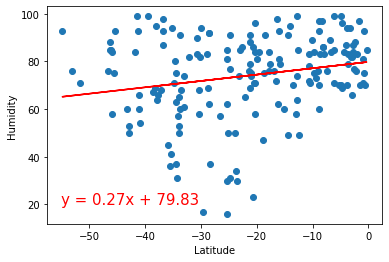

In [30]:
# Establish x value and find St. Pearson Correlation Coefficient for Humidity
south_hum = south_hem["Humidity"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_hum)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_hum)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Humidity"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (-55,20), fontsize=15, color="r")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28


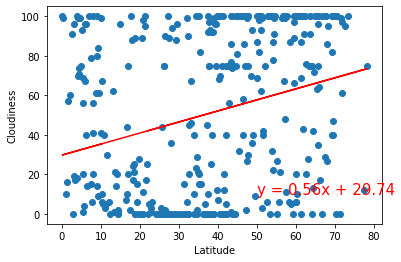

In [31]:
# Establish x value and find St. Pearson Correlation Coefficient for Cloudiness
north_cloud = north_hem["Cloudiness"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_cloud)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_cloud)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Cloudiness"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation, (50,10), fontsize=15, color="r")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.44


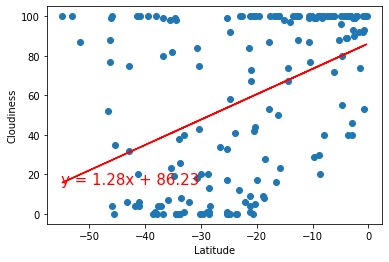

In [36]:
# Establish x value and find St. Pearson Correlation Coefficient for Cloudiness
south_cloud = south_hem["Cloudiness"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_cloud)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_cloud)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Cloudiness"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation, (-55,15), fontsize=15, color="r")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03


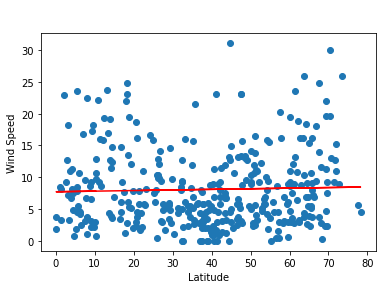

In [34]:
# Establish x value and find St. Pearson Correlation Coefficient for Wind Speed
north_spd = north_hem["Wind Speed"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_spd)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_spd)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Wind Speed"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation, (0,35), fontsize=15, color="r")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.28


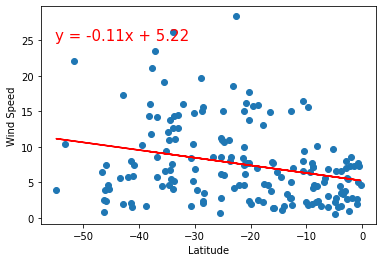

In [35]:
# Establish x value and find St. Pearson Correlation Coefficient for Wind Speed
south_spd = south_hem["Wind Speed"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_spd)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_spd)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Wind Speed"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation, (-55,25), fontsize=15, color="r")
plt.show()

# Observable Trends
## 3 trends that can be observed from the plots
### 1) Temperatures increase as the latitude approaches the equator (0), and decreases as moves away
### 2) No correlation can be seen in cloudiness, wind speed, or humidity along different latitudes
### 3) Cloudiness has a greater deviation in values than any other factor